In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/arjuntejaswi/plant-village",force=True)

In [ ]:
import os

dataset_path = '/content/plant-village'
os.listdir(dataset_path)

['PlantVillage']

In [ ]:
dataset_directory = '/content/plant-village/PlantVillage'
directory_list = [dir for dir in os.listdir(dataset_directory) if not dir.startswith('.')]
directory_list

['Tomato Spider Mites',
 'Potato Early Blight',
 'Potato Healthy',
 'Tomato Early Blight',
 'Tomato Target Spot',
 'Tomato Septoria Spot',
 'Bell Pepper Bacterial Spot',
 'Tomato Yellow Leaf Curl Virus',
 'Tomato Late Blight',
 'Tomato Mosaic Virus',
 'Potato Late Blight',
 'Tomato Bacterial Spot',
 'Tomato Leaf Mold',
 'Bell Pepper Healthy',
 'Tomato Healthy']

In [ ]:
for i in directory_list:
  print(len(os.listdir(f'/content/plant-village/PlantVillage/{i}')))

1676
1000
152
1000
1404
1771
997
3209
1909
373
1000
2127
952
1478
1591


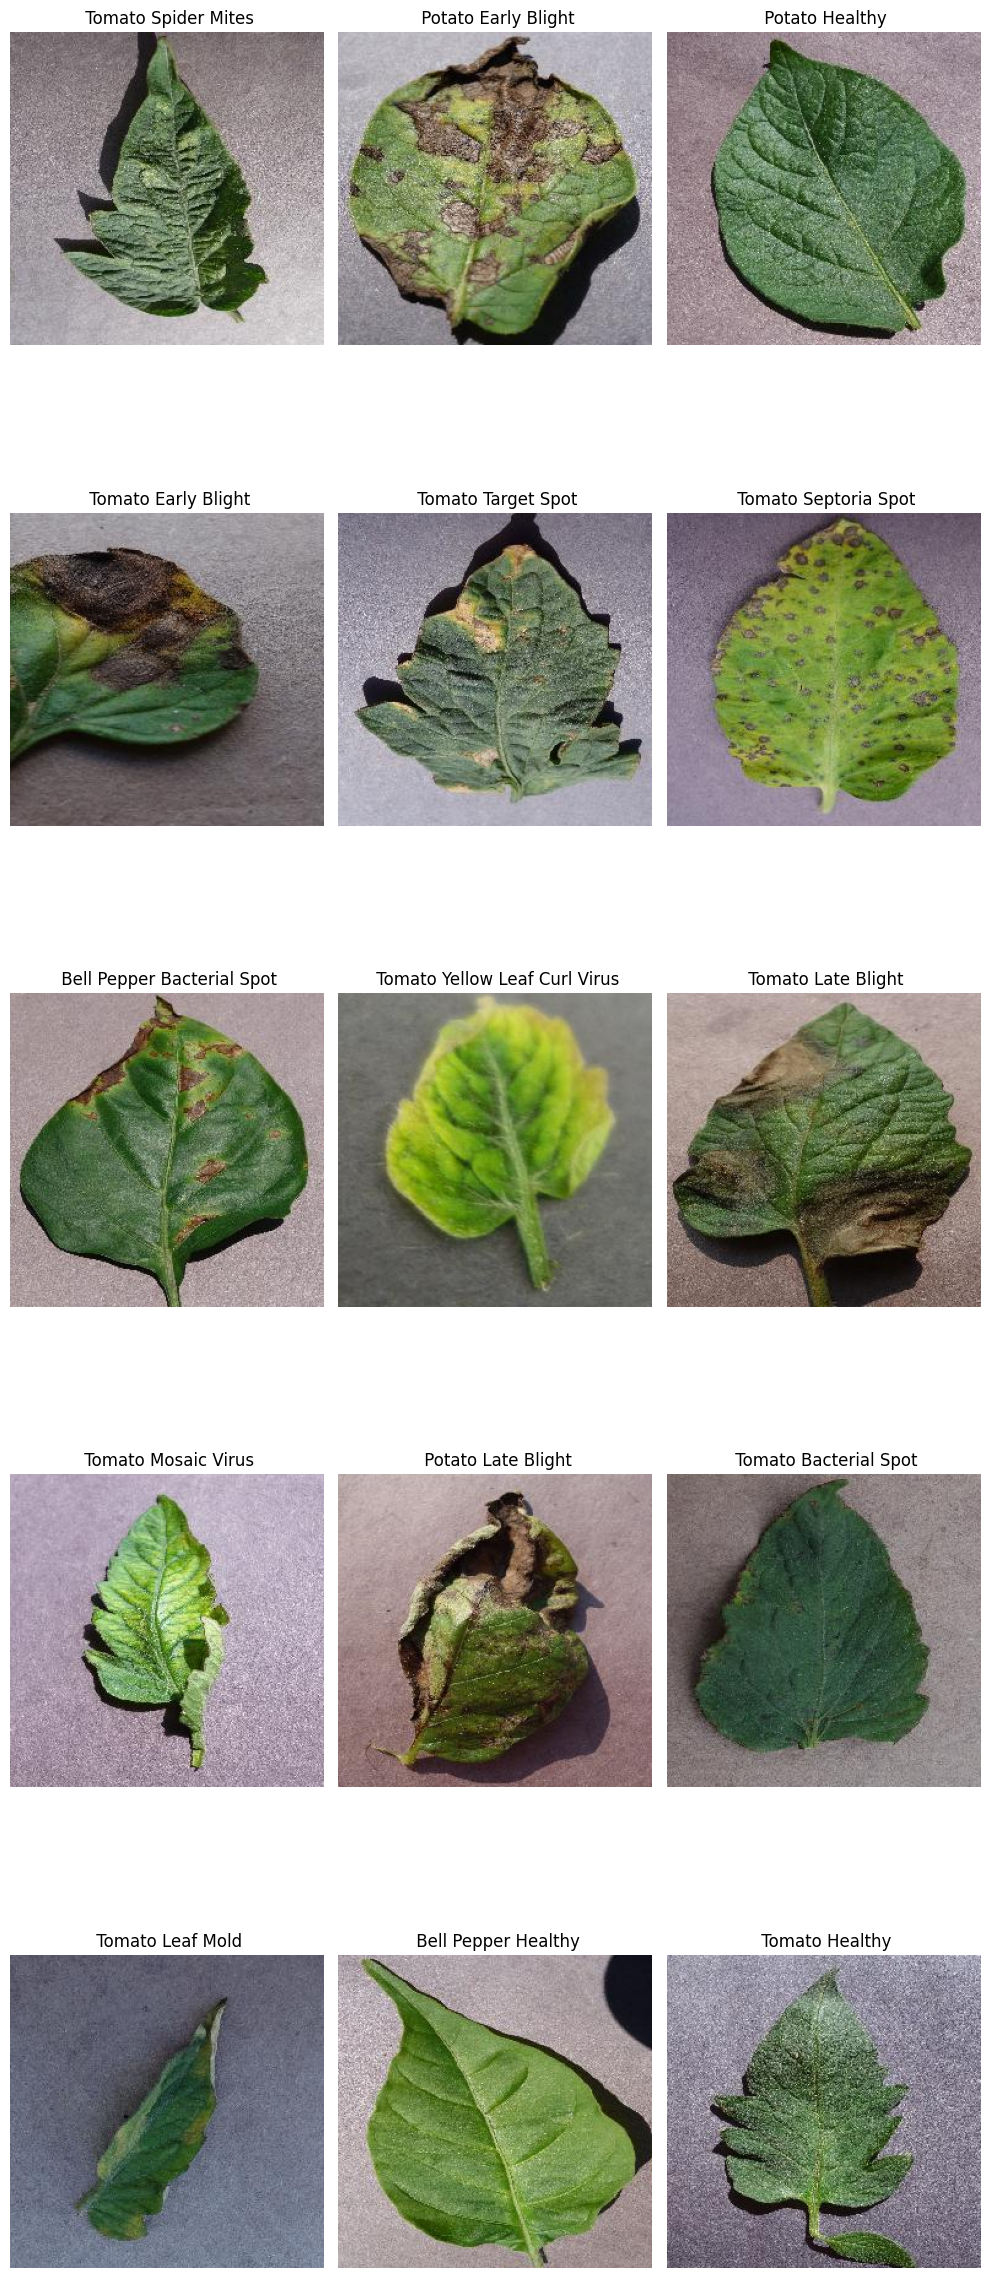

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

base_path = '/content/plant-village/PlantVillage/'

# Get the list of all subdirectories (these are your labels)
directory_list = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]

# Randomly choose an image from each subdirectory
random_images = []

for directory in directory_list:
    # Get all jpg files in the current directory
    jpg_files = [f for f in os.listdir(os.path.join(base_path, directory)) if f.lower().endswith('.jpg')]

    if jpg_files:
        # Select a random image from the list of jpg files
        random_image = random.choice(jpg_files)
        random_images.append((directory, random_image))

# Number of columns
columns = 3  # Change this to adjust the number of columns

# Calculate the number of rows needed based on the total number of images and columns
rows = math.ceil(len(random_images) / columns)

# Display the random images with their labels in a grid structure
plt.figure(figsize=(10, rows * 5))  # Adjust figure size based on number of rows

for i, (label, image_file) in enumerate(random_images, start=1):
    # Read the image
    img_path = os.path.join(base_path, label, image_file)
    img = mpimg.imread(img_path)

    # Calculate the subplot position
    plt.subplot(rows, columns, i)

    # Display the image with the label as the title
    plt.imshow(img)
    plt.title(f' {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory paths
train_dir = '/content/plant-village/PlantVillage/'
batch_size = 32
image_size = (150, 150)

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(15, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
)

Found 20638 images belonging to 15 classes.
Epoch 1/10
644/644 [==============================] - 33s 48ms/step - loss: 1.0846 - accuracy: 0.6398
Epoch 2/10
644/644 [==============================] - 34s 52ms/step - loss: 0.4367 - accuracy: 0.8520
Epoch 3/10
644/644 [==============================] - 31s 48ms/step - loss: 0.2768 - accuracy: 0.9053
Epoch 4/10
644/644 [==============================] - 31s 48ms/step - loss: 0.1732 - accuracy: 0.9401
Epoch 5/10
644/644 [==============================] - 30s 47ms/step - loss: 0.1389 - accuracy: 0.9546
Epoch 6/10
644/644 [==============================] - 30s 47ms/step - loss: 0.1106 - accuracy: 0.9616
Epoch 7/10
644/644 [==============================] - 30s 47ms/step - loss: 0.0900 - accuracy: 0.9688
Epoch 8/10
644/644 [==============================] - 30s 46ms/step - loss: 0.0612 - accuracy: 0.9793
Epoch 9/10
644/644 [==============================] - 31s 48ms/step - loss: 0.0799 - accuracy: 0.9736
Epoch 10/10
644/644 [=================

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 17, 17, 128)      

In [ ]:
history.history

{'loss': [1.0846422910690308,
  0.43672850728034973,
  0.2767665982246399,
  0.17317882180213928,
  0.1388518065214157,
  0.11060875654220581,
  0.09002680331468582,
  0.061159927397966385,
  0.07992368191480637,
  0.07034513354301453],
 'accuracy': [0.6397651433944702,
  0.8520333766937256,
  0.9052703380584717,
  0.9400659799575806,
  0.9546248912811279,
  0.961613118648529,
  0.9687954783439636,
  0.9793264269828796,
  0.973599910736084,
  0.977530837059021]}

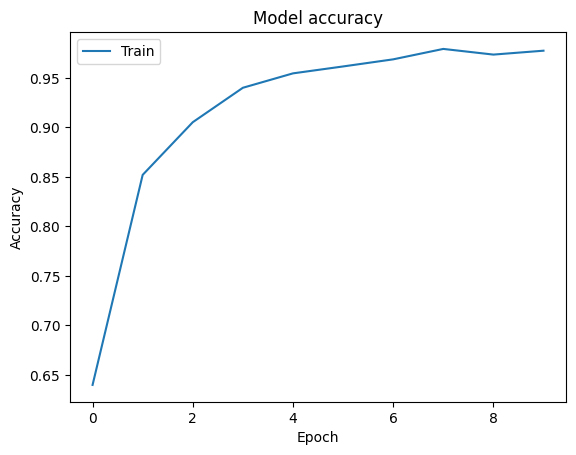

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
# Get the class indices from the train_generator
class_indices = train_generator.class_indices

# Display the class names in a sorted order
print("Class names and their indices:")
for class_name, index in sorted(class_indices.items(), key=lambda x: x[1]):
    print(f"{index}: {class_name}")

Class names and their indices:
0: Pepper__bell___Bacterial_spot
1: Pepper__bell___healthy
2: Potato___Early_blight
3: Potato___Late_blight
4: Potato___healthy
5: Tomato_Bacterial_spot
6: Tomato_Early_blight
7: Tomato_Late_blight
8: Tomato_Leaf_Mold
9: Tomato_Septoria_leaf_spot
10: Tomato_Spider_mites_Two_spotted_spider_mite
11: Tomato__Target_Spot
12: Tomato__Tomato_YellowLeaf__Curl_Virus
13: Tomato__Tomato_mosaic_virus
14: Tomato_healthy


In [ ]:
from google.colab import files

model_save_path = '/content/model.h5'

model.save(model_save_path)

files.download(model_save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>